# Pandas series 

In [2]:
import pandas as pd

In [9]:
prices=pd.Series([1,2,3,4,5],index=['a','b','c','d','e'])

In [10]:
prices

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [13]:
#Display list of indexes
prices.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [14]:
#.iloc to specify that you are slicing by numeric index
prices.iloc[1:3]

b    2
c    3
dtype: int64

In [17]:
#.loc to specify that you are slicing by index label.
prices.loc['a':'d']

a    1
b    2
c    3
d    4
dtype: int64

In [22]:
#numeric index series
prices=pd.Series(range(0,10,2),index=range(1,6))
print(prices.loc[2])
print(prices.iloc[2])

2
4


In [27]:
#series operations
#multiplication of 2 series
prices=pd.Series([1,2,3,4,5],index=['a','b','c','d','e'])
inventory=pd.Series(range(1,6),index=['b','l','a','c','k'])
prices*inventory

a     3.0
b     2.0
c    12.0
d     NaN
e     NaN
k     NaN
l     NaN
dtype: float64

In [35]:
#conditional series checking
print(prices>2)
print("\nusing loc")
print(prices.loc[prices>2])

a    False
b    False
c     True
d     True
e     True
dtype: bool

using loc
c    3
d    4
e    5
dtype: int64


In [41]:
#mean, median and other arithematic operations
print(prices.mean())
print(prices.median())
print(prices.std())
print(prices.describe())


3.0
3.0
1.5811388300841898
count    5.000000
mean     3.000000
std      1.581139
min      1.000000
25%      2.000000
50%      3.000000
75%      4.000000
max      5.000000
dtype: float64


In [42]:
#.apply method and lambda
discount_price=prices.apply(lambda x: .9*x if x<4 else x)
print(discount_price)

a    0.9
b    1.8
c    2.7
d    4.0
e    5.0
dtype: float64


In [55]:
#exercise 1

prices = pd.Series([1,1,2,3,5],
              index=['apple', 'pear', 'banana', 'mango', 'jackfruit'])

inventory = pd.Series([10, 50, 41, 22],
              index=['pear', 'banana', 'mango', 'apple'])

one_ind = inventory.iloc[1:4:2]
two_less = prices.loc[prices<prices.mean()]
three_onhand = prices*inventory

print(one_ind)
print(two_less)
print(three_onhand['mango'])

print((prices*inventory).loc['mango'])

banana    50
apple     22
dtype: int64
apple     1
pear      1
banana    2
dtype: int64
123.0
123.0


# Pandas Dataframes

In [74]:
#Express Data frames as a dictionary
produce=pd.DataFrame({'price':prices,'inventory':inventory})
print(produce)

           price  inventory
apple          1       22.0
banana         2       50.0
jackfruit      5        NaN
mango          3       41.0
pear           1       10.0


In [63]:
newDf=pd.DataFrame({'priceList':prices})
newDf

,priceList
apple,1
pear,1
banana,2
mango,3
jackfruit,5


In [67]:
import numpy as np

numpydf=pd.DataFrame(np.array([1,2,3,4]).reshape(2,2))

numpydf

,0,1
0,1,2
1,3,4


In [73]:
pdnew=pd.Series(np.array([1,2,3,4]),index=['first','second','third','fourth'])
pdnew

first     1
second    2
third     3
fourth    4
dtype: int64

In [117]:
#Usage of .loc with data frames
produce=pd.DataFrame({'price':prices,'inventory':inventory,'Product':three_onhand})
#for .loc always use key indexes . It can be int or string
print(produce.loc['apple':'mango','price'])

#in case of .iloc it should be always integers for index slicing
print(produce.iloc[1:4:3,2])

#using .iloc to print everything in data frame
print(produce.iloc[1:4:3,:])

apple        1
banana       2
jackfruit    5
mango        3
Name: price, dtype: int64
banana    100.0
Name: Product, dtype: float64
        price  inventory  Product
banana      2       50.0    100.0


In [118]:
#Accessing particular pandas series
produce['Product']

apple         22.0
banana       100.0
jackfruit      NaN
mango        123.0
pear          10.0
Name: Product, dtype: float64

In [247]:
#adding new column. ordering of columns are very important

produce['new_inventory_product']=  produce['inventory'] * produce['price'] *2
produce['inventory_value'] = produce['inventory'] * produce['price']
produce

,price,discount_price,inventory,clearance_price,new_inventory_product,inventory_value
apple,1,1.0,22.0,0.50,44.0,22.0
banana,2,2.0,50.0,1.00,200.0,100.0
jackfruit,5,4.5,NaN,2.25,NaN,NaN
mango,3,3.0,41.0,1.50,246.0,123.0
pear,1,1.0,10.0,0.50,20.0,10.0


In [122]:
#dropping a column
#axis is specified becuse we need to identify the column with column
produce.drop('inventory_value',axis=1)

,price,inventory,Product,new_inventory_product
apple,1,22.0,22.0,44.0
banana,2,50.0,100.0,200.0
jackfruit,5,NaN,NaN,NaN
mango,3,41.0,123.0,246.0
pear,1,10.0,10.0,20.0


In [123]:
produce['price']

apple        1
banana       2
jackfruit    5
mango        3
pear         1
Name: price, dtype: int64

In [132]:
#controlling or filtering the contents

print(produce.loc[:,produce.max()<51])
print(produce.loc[produce['price']==1,'price':'new_inventory_product'])
print(produce.loc[produce['price']==1,'inventory_value':])

           price  inventory
apple          1       22.0
banana         2       50.0
jackfruit      5        NaN
mango          3       41.0
pear           1       10.0
       price  inventory  Product  new_inventory_product
apple      1       22.0     22.0                   44.0
pear       1       10.0     10.0                   20.0
       inventory_value
apple             22.0
pear              10.0


In [ ]:
# NOTE: In case of .loc always remember 
#firsr value before comma(,) control the individiual data elements eiether using product['index_value'] or using #'indesx_start' & end
#Second value signifies what all columns we need to display

In [136]:
#Updating the data frame
#before Change
print(produce)
produce.loc[produce['price']==2,'new_inventory_product':'new_inventory_product']*=22
print(produce)

           price  inventory  Product  new_inventory_product  inventory_value
apple          1       22.0     22.0                   44.0             22.0
banana         2       50.0    100.0                   23.0            100.0
jackfruit      5        NaN      NaN                    NaN              NaN
mango          3       41.0    123.0                  246.0            123.0
pear           1       10.0     10.0                   20.0             10.0
           price  inventory  Product  new_inventory_product  inventory_value
apple          1       22.0     22.0                   44.0             22.0
banana         2       50.0    100.0                  506.0            100.0
jackfruit      5        NaN      NaN                    NaN              NaN
mango          3       41.0    123.0                  246.0            123.0
pear           1       10.0     10.0                   20.0             10.0


In [147]:
#Assignment
#Select all information from produce for pear and jackfruit
#Create a clearance_price column in produce which includes prices reduced from the original prices by 50%.
#Then set two_clearance equal the entire row at index 3.

import pandas as pd

prices = pd.Series([1,1,2,3,5],
              index=['apple', 'pear', 'banana', 'mango', 'jackfruit'])

inventory = pd.Series([10, 50, 41, 22],
              index=['pear', 'banana', 'mango', 'apple'])

discount_prices = prices.apply(lambda x: .9*x if x>3 else x)

produce = pd.DataFrame({'price':prices,
                        'discount_price':discount_prices,
                        'inventory':inventory})
#print(produce)

one_select = produce.loc['jackfruit':'pear':2]

print(one_select)

produce['clearance_price']= produce.loc[:,'discount_price':'discount_price']*0.5

#print(produce)

two_clearance = produce.iloc[2:3,:]
print(two_clearance)

           price  discount_price  inventory
jackfruit      5             4.5        NaN
pear           1             1.0       10.0
           price  discount_price  inventory  clearance_price
jackfruit      5             4.5        NaN             2.25



# Merging 2 Panda dataframes

In [149]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                        index=[4, 5, 6, 7])
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8, 9, 10, 11])



In [158]:
#put all frames in a list
frames=[df1,df2,df3]

#just regular concat, by default axis 0
result=pd.concat(frames)

print(result)

#format the output
result=pd.concat(frames,axis=0)

print(result)

#format the output
result=pd.concat(frames,axis=1)

print(result)

      A    B    C    D
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
4    A4   B4   C4   D4
5    A5   B5   C5   D5
6    A6   B6   C6   D6
7    A7   B7   C7   D7
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11
      A    B    C    D
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
4    A4   B4   C4   D4
5    A5   B5   C5   D5
6    A6   B6   C6   D6
7    A7   B7   C7   D7
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11
      A    B    C    D    A    B    C    D    A    B    C    D
0    A0   B0   C0   D0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1    A1   B1   C1   D1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2    A2   B2   C2   D2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
3    A3   B3   C3   D3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4   NaN  NaN  NaN  NaN   A4   B4   C4   D4  NaN  NaN  NaN  NaN
5   NaN  NaN  NaN  NaN  

In [163]:
#Merging data frames: It is same as inner join in sql

left = pd.DataFrame({'key': ['dog', 'cat', 'fish', 'bird'],
                         'A': ['A0', 'A1', 'A2', 'A3'],
                         'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key': ['bird', 'fish', 'cat', 'dog'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})

#join left and right dataframes on key column of left matches key columns of right

result=pd.merge(left,right,on='key')
print(result)

    key   A   B   C   D
0   dog  A0  B0  C3  D3
1   cat  A1  B1  C2  D2
2  fish  A2  B2  C1  D1
3  bird  A3  B3  C0  D0


In [165]:
#Merging or joining on multiple columns

left = pd.DataFrame({'city': ['Springfield', 'Springfield',
                                  'Dover', 'Chicago'],
                         'state': ['IL', 'OH', 'DE', 'IL'],
                         'A': ['A0', 'A1', 'A2', 'A3'],
                         'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'city': ['Cleveland', 'Dover',
                                   'Springfield', 'Chicago'],
                          'state': ['OH', 'NH', 'IL', 'IL'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})

result_new= pd.merge(left,right,on=('city','state'))
print(result_new)

          city state   A   B   C   D
0  Springfield    IL  A0  B0  C2  D2
1      Chicago    IL  A3  B3  C3  D3


In [172]:
#Assignment
#Join the DataFrames below to return a new DataFrame of users with listed birthdays, along with their addresses if you have them.

#use left join as they are asking use address only if tgey are present
import pandas as pd
dobs = pd.DataFrame({'name': ['Suzy', 'Wei','Yulia', 'Arvind'],
                   'day': ['12', '19', '2', '23'],
                   'month': ['Dec', 'Nov', 'May', 'Jul']})

addresses = pd.DataFrame({'name': ['Marisol', 'Arvind','Stephan', 'Suzy'],
                     'city': ['San Francisco', 'Denver', 'Austin', 'Seattle'],
                     'state': ['CA', 'CO', 'TX', 'WA']})


birthday_address = pd.merge(dobs,addresses,how='left',on='name')
print(birthday_address)

     name day month     city state
0    Suzy  12   Dec  Seattle    WA
1     Wei  19   Nov      NaN   NaN
2   Yulia   2   May      NaN   NaN
3  Arvind  23   Jul   Denver    CO


# Split, Apply, and Combine Data


In [184]:
#splitting data ---> group by clause in sql
grocery = pd.DataFrame({'category':['produce', 'produce', 'meat',
                                        'meat', 'meat', 'cheese', 'cheese'],
                            'item':['celery', 'apple', 'ham', 'turkey',
                                    'lamb', 'cheddar', 'brie'],
                            'price':[.99, .49, 1.89, 4.34, 9.50, 6.25, 8.0]})

result=grocery.groupby('category')

grocery

,category,item,price
0,produce,celery,0.99
1,produce,apple,0.49
2,meat,ham,1.89
3,meat,turkey,4.34
4,meat,lamb,9.50
5,cheese,cheddar,6.25
6,cheese,brie,8.00


In [181]:
import numpy as np

grouped =grocery.groupby('category')

#group by on categoty then perform aggregate calculation on columns
print(grouped.aggregate(np.count_nonzero))

print(grouped.aggregate(np.sum))


          item  price
category             
cheese       2    2.0
meat         3    3.0
produce      2    2.0
          price
category       
cheese    14.25
meat      15.73
produce    1.48


In [183]:
#transform function. just transform the value.  there is no group by here. It just modifies all values

grouped.transform(lambda x: x-x.mean())

,price
0,0.250000
1,-0.250000
2,-3.353333
3,-0.903333
4,4.256667
5,-0.875000
6,0.875000


In [193]:
#filter 

grouped.filter(lambda x: len(x)>2)

,item,price
2,ham,1.89
3,turkey,4.34
4,lamb,9.50


In [231]:
#Assignment
#Perform the following operations using split-apply-combine.

#Remove all items in categories where the mean price in that category is less than $3.00.
#Find the maximum values in each category for all features. (What does Pandas take to be the maximum value of the 'item' column?)
#If the maximum price in a category is more than $3.00, reduce all prices in that category by 10%. Return a Series of the new price column.

import pandas as pd
import numpy as np

grocery = pd.DataFrame({'category':['produce', 'produce', 'meat',
                                    'meat', 'meat', 'cheese', 'cheese'],
                        'item':['celery', 'apple', 'ham', 'turkey',  'lamb',
                                'cheddar', 'brie'],
                        'price':[.99, .49, 1.89, 4.34, 9.50, 6.25, 8.0]})

group_grocery=grocery.groupby('category')
one_mean = group_grocery.filter(lambda x: x.mean()>=3.00)
two_mean= group_grocery.aggregate(np.max)
temp=group_grocery.filter(lambda x: x.mean()>=0)
#three_mean=group_grocery.apply(lambda x: (x - 0.1*x) if np.max > 3.00 else x)
#one_mean= pd.merge(grocery,)
#print(one_mean)
#three_mean
temp

,item,price
0,celery,0.99
1,apple,0.49
2,ham,1.89
3,turkey,4.34
4,lamb,9.50
5,cheddar,6.25
6,brie,8.00


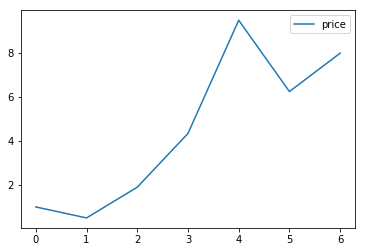

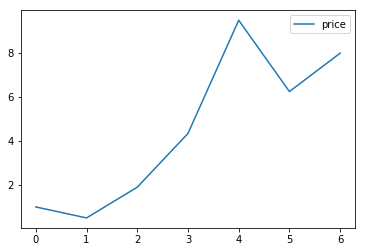

In [236]:
#dataframe.plot() adds object for plot list. then call matplotlib show to display it
import matplotlib.pyplot as plt
temp.plot()
grocery.plot()
plt.show()

In [238]:
%matplotlib inline

In [242]:
temp.plot( y = 'price', kind = 'scatter')

ValueError: scatter requires an x and y column

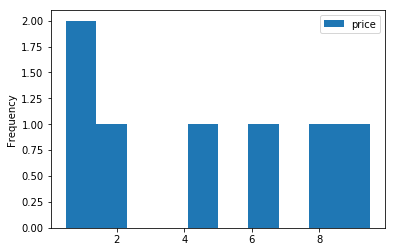

In [244]:
#plotting distributions
temp.plot(y = 'price', kind = 'hist')

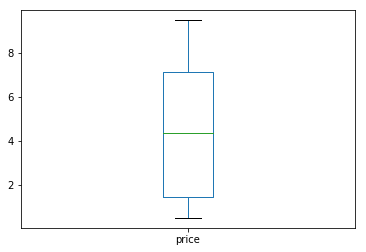

In [245]:
temp.plot(y = 'price', kind = 'box')

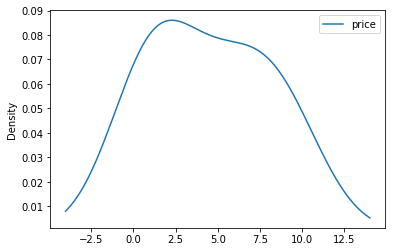

In [246]:
   temp.plot(y = 'price', kind = 'kde') 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x127341e48>]],
      dtype=object)

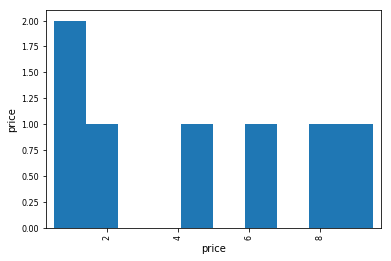

In [249]:
pd.plotting.scatter_matrix(temp)